#**HOMEWORK 3: REGRESSION AND BAYESIAN STATISTICS**






## **Problem 1: Regression**
Teenager Morty is a big fan of cars. Unlike other boys of his age, he’s keen on cars with high mileage per 
gallon (MPG) – Morty regularly dreams about long journeys through Mid-West flatlands. Unfortunately, 
not all automotive producers publish accurate data on this very important parameter. To remedy the 
situation, he asked his uncle Rick to help him in predicting actual MPG from other known properties of a 
car.

>


They decided to use a Car MPG dataset (sometimes referred to as Auto MPG dataset, some description 
is available [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg)). File with data was kindly shared by Rick (see carmpg_dataset.csv in the 
attachment). Let’s help Rick and Morty with their analysis.

### **1. ** 
Investigate multicollinearity in the original dataset. Compute Pearson’s correlation
coefficient between pairs of features and plot obtained covariance matrix.
> 
a. Which features are the most correlated?
>
b. Based on the covariance matrix, which features can be selected without loss in 
predictive ability? In other words, which set of covariates seems to contain most of the 
useful information and does not contain duplicated (or very similar) features?

#### **Reading the data**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sts

%matplotlib inline

In [ ]:
dataset = pd.read_csv('carmpg_dataset.csv')

In [ ]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8.0,8,307.0,130.0,3504,12.0,2015
1,15.0,8,350.0,165.0,3693,11.5,2015
2,18.0,8,318.0,150.0,3436,11.0,2015
3,16.0,8,304.0,150.0,3433,12.0,2015
4,17.0,8,302.0,140.0,3449,10.5,2015
...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,2003
388,44.0,4,97.0,52.0,2130,24.6,2003
389,32.0,4,135.0,84.0,2295,11.6,2003
390,28.0,4,120.0,79.0,2625,18.6,2003


#### **Pearson’s correlation coefficient**

In [ ]:
corr_matrix = dataset.corr(method='pearson')

In [ ]:
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.779069,-0.805134,-0.777203,-0.830645,0.425674,-0.583311
cylinders,-0.779069,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805134,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.777203,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.830645,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.425674,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
model_year,-0.583311,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


#### **Plot obtained covariance matrix**

<Axes: >

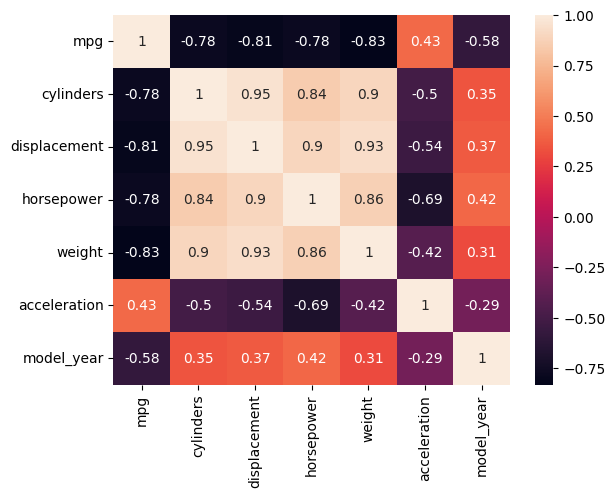

In [ ]:
sns.heatmap(corr_matrix, annot=True)

#### **Answer**
#### **a.**
The **cylinders** and **displacement** are the most correlated features (with the Pearson's correlation value is 0.95)
#### **b.**
From the correlation matrix, we can see that the covariates cylinders, 
displacement, horsepower, and weight have a strong correlation with mpg, while acceleration and model_year have a weaker correlation.
> 
Cylinders, displacement, horsepower, and weight are highly correlated with each other. Therefore, we should only choose one of them. Among them, weight has the highest absolute correlation with mpg. So, we can choose weight as the predictor covariate.
>
We can also see that acceleration, model_year have a weak correlation with mpg and are not highly correlated with other predictor covariates. So acceleration and model_year should be added to the set of features.
> =>  The set of features: **weight**, **acceleration** and **model_year** seems to contain most of the userful information and does not contain duplicated features


> => The multicollinearity happens in this dataset since there are some covariates that highly depend on each other.




### **2. [1 pt]** 
Perform a simple linear regression using full dataset where target is an mpg column, 
covariates – all other columns. Based on p-values from t-tests, which covariates have 
coefficients that are significantly different from zero at 5% significance level?

#### **Simple linear regression**

In [ ]:
import statsmodels.api as sm

In [ ]:
y = dataset.iloc[:, :1]
y

,mpg
0,8.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [ ]:
X = dataset.iloc[:, 1:7]
X

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,2015
1,8,350.0,165.0,3693,11.5,2015
2,8,318.0,150.0,3436,11.0,2015
3,8,304.0,150.0,3433,12.0,2015
4,8,302.0,140.0,3449,10.5,2015
...,...,...,...,...,...,...
387,4,140.0,86.0,2790,15.6,2003
388,4,97.0,52.0,2130,24.6,2003
389,4,135.0,84.0,2295,11.6,2003
390,4,120.0,79.0,2625,18.6,2003


In [ ]:
X_add_one = sm.add_constant(X)

In [ ]:
results = sm.OLS(endog=y, exog=X_add_one, hasconst=True).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.3
Date:                Wed, 10 May 2023   Prob (F-statistic):          3.72e-135
Time:                        17:01:43   Log-Likelihood:                -1038.1
No. Observations:                 392   AIC:                             2090.
Df Residuals:                     385   BIC:                             2118.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1578.2603    105.940     14.898      0.000    1369.967    1786.554
cylinders       -0.4020      0.334     -1.205      0.229      -1.058       0.254
displacement     0.0079      0.007      1.070      0.285      -0.007       0.022
horsepower       0.0021      0.014      0.153      0.878      -0.025       0.029
weight          -0.0068      0.001    -10.061      0.000      -0.008      -0.005
acceleration     0.1025      0.102      1.000      0.318      -0.099       0.304
model_year      -0.7645      0.053    -14.466      0.000      -0.868      -0.661
==============================================================================
Omnibus:                       35.335   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.951
Skew:                           0.603   Prob(JB):                     1.17e-12
Kurtosis:                       4.382   Cond. No.                     2.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### **Answer**
Based on p-values from t-tests: **weight** and **model_year** are covariates have coefficients that are significantly different from zero at 5% significance level




### **3. ** 
Loop over all possible sets of covariates and perform simple linear regression over each 
individual feature set predicting target value (mpg) using full dataset. For each model compute 
and store BIC and Mallow’s 𝐶𝑝 (as defined in Wasserman’s “All of Statistics”, p. 219).


#### **Compute Mallow's Cp**

In [ ]:
def mallow_Cp(ssr, size, mse_resid):
  return ssr + 2 * size * mse_resid

#### **Perform the linear regression over all set of features**

In [ ]:
def fit_ols(X_, y_):
  X_const = sm.add_constant(X_)
  model = sm.OLS(endog=y_, exog=X_const, hasconst=True).fit()
  cp_value = mallow_Cp(model.ssr, len(model.params), model.mse_resid)
  return model.bic, cp_value

In [ ]:
from tqdm import tnrange
import itertools

feature_list = []
len_set = []
bic_values = []
cp_values = []

# First run through the number of features in the set
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):
  # Run all k-combination of features
  for combi in itertools.combinations(X.columns,k):
    result = fit_ols(X[list(combi)], y)
    feature_list.append(combi)
    len_set.append(len(combi))
    bic_values.append(result[0])
    cp_values.append(result[1])

# Store in dataframe
df = pd.DataFrame({'Number of features': len_set, 'Features': feature_list, 'BIC': bic_values, 'Cp': cp_values})



<ipython-input-14-0bf0ae503d79>:10: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
df

,Number of features,Features,BIC,Cp
0,1,"(cylinders,)",2371.689184,9540.973775
1,1,"(displacement,)",2328.180265,8538.654252
2,1,"(horsepower,)",2374.574015,9611.447310
3,1,"(weight,)",2278.678044,7525.688022
4,1,"(acceleration,)",2659.378178,19875.663598
...,...,...,...,...
58,5,"(cylinders, displacement, horsepower, accelera...",2203.619024,5967.477846
59,5,"(cylinders, displacement, weight, acceleration...",2112.140402,4725.439332
60,5,"(cylinders, horsepower, weight, acceleration, ...",2113.280849,4739.207079
61,5,"(displacement, horsepower, weight, acceleratio...",2113.592761,4742.979543


### **4. [1 pt]** 
Select the best feature set according to BIC and 𝐶𝑝 criteria.


#### **Get the best set of features basing on BIC and Cp criteria**

In [ ]:
best_with_Cp = df[df.Cp == df.Cp.min()]
best_with_Cp

,Number of features,Features,BIC,Cp
19,2,"(weight, model_year)",2097.088386,4687.750142


In [ ]:
best_with_BIC = df[df.BIC == df.BIC.min()]
best_with_BIC

,Number of features,Features,BIC,Cp
19,2,"(weight, model_year)",2097.088386,4687.750142


#### **Answer**
*The BIC score is identical to Mallows Cp except that it puts a more severe penalty for complexity.* (as in Wasserman’s “All of Statistics”, p. 221).
Hence, if we choose the best set of features base on BIC and Mallow Cp with the minimum values, they both give the same result. The set of **weight** and **model_year** is the best feature set.




### **5. ** 
Split data randomly into two datasets: train (80% of data points) and test (20% of original 
dataset). Train a simple linear regression model based on each of the best feature sets from 
questions 1b, 2 and 4. Then, compare their performance on both training and test datasets and 
plot a grouped bar chart where:
> 
a. x-axis represents different feature sets;
>
b. y-axis depicts model quality measured by RSS;
> 
c. color (hue) encodes dataset used (train or test).


#### **Traning the set of best features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# I got the same set of features in problem 2, 4
feature_set_1b = ['weight', 'acceleration', 'model_year']
feature_set_2 = ['weight', 'model_year']
feature_set_4 = ['weight', 'model_year']

In [ ]:
feature_sets = []
rss = []
type_of_data = []
rss_mean = []

def train_simple_linear_regression(X_train_, y_train_, X_test_, y_test_, feature_set):
  X_train_const = sm.add_constant(X_train_[feature_set])
  X_test_const = sm.add_constant(X_test_[feature_set])
  model = sm.OLS(endog=y_train_, exog=X_train_const, hasconst=True).fit()
  # Get the predict values
  y_test_predict = model.predict(X_test_const)

  # Get the residuals
  resid_test = y_test_.sub(y_test_predict, axis=0)

  # Get the residual sum of squares (RSS)
  rss_train = model.ssr
  rss_test = float((resid_test ** 2).sum())
  
  # Get the mean value of RSS:
  rss_train_mean = rss_train / len(y_train_)
  rss_test_mean = rss_test / len(y_test_)

  # Information to plot the bar chart:
  s = ", ".join(feature_set)
  feature_sets.extend([s, s])
  rss.extend([rss_train, rss_test])
  rss_mean.extend([rss_train_mean, rss_test_mean])
  type_of_data.extend(["train", "test"])

  return rss_train, rss_test

In [ ]:
# Result for set of best features in 1b: 'weight','acceleration', 'model_year'
result1 = train_simple_linear_regression(X_train, y_train, X_test, y_test, feature_set_1b)
print("RSS for training data:", result1[0])
print("RSS for testing data:", result1[1])

RSS for training data: 3883.4948547745284
RSS for testing data: 754.9016013590298


In [ ]:
# Result for set of best features in 2 and 4: 'weight', 'model_year'
result2 = train_simple_linear_regression(X_train, y_train, X_test, y_test, feature_set_2)
print("RSS for training data:", result2[0])
print("RSS for testing data:", result2[1])

RSS for training data: 3931.7607101013473
RSS for testing data: 705.1626415096854


#### **Plot the bar chart**


In [ ]:
df = pd.DataFrame({'Features': feature_sets, 'RSS': rss, "RSS mean": rss_mean, 'Type': type_of_data})

In [ ]:
df

,Features,RSS,RSS mean,Type
0,"weight, acceleration, model_year",3883.494855,12.407332,train
1,"weight, acceleration, model_year",754.901601,9.555716,test
2,"weight, model_year",3931.760710,12.561536,train
3,"weight, model_year",705.162642,8.926109,test


<Axes: xlabel='Features', ylabel='RSS'>

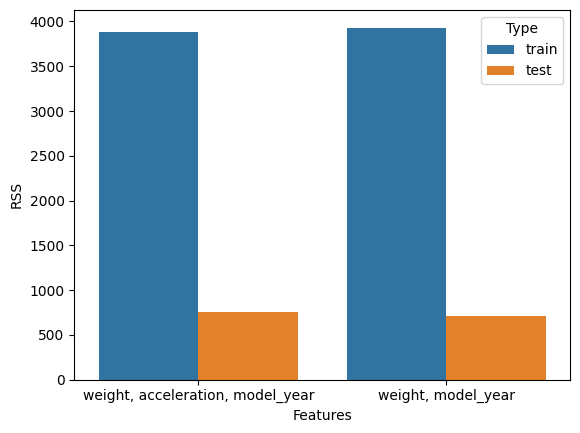

In [ ]:
sns.barplot(data=df, x="Features", y="RSS", hue="Type")

###**6. **### 
 Interpret obtained results
> 
a. Which dataset gives the smallest error (RSS) on the test set?
>
b. How do errors on test and training datasets differ from each other (and do they)? What 
does it mean?
> 
c. What else can you mention about the models and the best set of features?


<Axes: xlabel='Features', ylabel='RSS mean'>

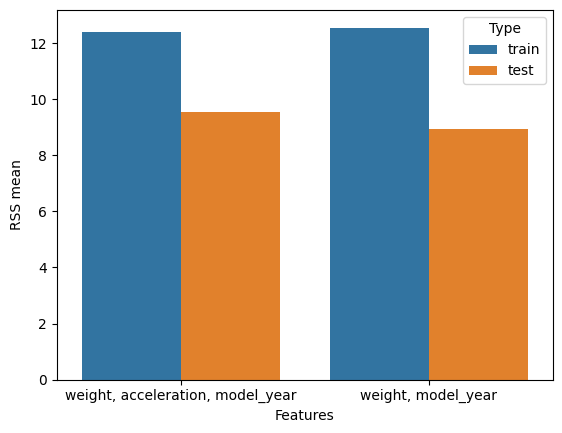

In [ ]:
sns.barplot(data=df, x="Features", y="RSS mean", hue="Type")

#### **Answer**
#### **a.**
Base on the bar chart about RSS, we can see that both feature sets give almost the same values for RSS, but it seems the set which contains **weight** and **model_year** gives the smaller RSS on the test set (but not significantly). The main idea is that **weight** and **model_year** are two main features that give a good predict on this dataset.
#### **b.**
If we take the mean value of RSS on the training dataset and testing dataset (the above plot), the mean value of training dataset will be less then the testing dataset (the ratio of RSS of training and testing < 4). It is pretty fine and obvious to see, since we train our model on the training data, so the model will fit well on training dataset. The result on training dataset will give a better result and smaller mean of RSS than on the testing dataset.
>
Usually, when consider the performance of model, we need to consider its performance on testing dataset. In our case, **weight** and **model_year** gave smaller RSS on testing dataset (but not significantly).
#### **c.**
In my solution, it seems like three ways of choosing the best features: based on correlation matrix, based on p-values from t-tests and based on BIC, Cp values seem that they all give the same set of best features: **weight** and **model_year**. The model of the best set performs much more better then the model which applies to all the features (because of a strong multicollinearity in the original dataset)
>=> Feature selection is very important when working on linear regression model.




###**7. **### 
Select the model trained on full dataset using the best feature set obtained with BIC 
criterion. Plot a series of scatter plots with y-axis depicting residuals of the models and x-axis 
representing one of the selected features in the set (i.e., number of plots = cardinality of the 
feature set). Interpret the results. Is linear model a good model for the data?


#### **Train on full dataset using the best feature set obtained with BIC criterion**


In [ ]:
def estimate_new_model(X_new, y_new, feature_list):
  X_add_const_new = sm.add_constant(X_new[feature_list])

  new_model = sm.OLS(endog=y_new, exog=X_add_const_new, hasconst=True).fit()
  new_residuals = new_model.resid

  fig, ax= plt.subplots(ncols=len(feature_list), figsize=(14, 5))

# Plot the residual
  for i in range(len(feature_list)):
    ax[i].set_ylabel('residuals')
    ax[i].axhline(0, c="red")
    sns.scatterplot(x=X_new[feature_list[i]], y=new_residuals, ax=ax[i])

# Plot the target 
  fig, ax= plt.subplots(ncols=len(feature_list), figsize=(14, 5))
  for i in range(len(feature_list)):
    sns.scatterplot(x=X_new[feature_list[i]], y=y_new["mpg"], ax=ax[i], color="green")

  plt.show()
  return new_model.bic, new_model.ssr

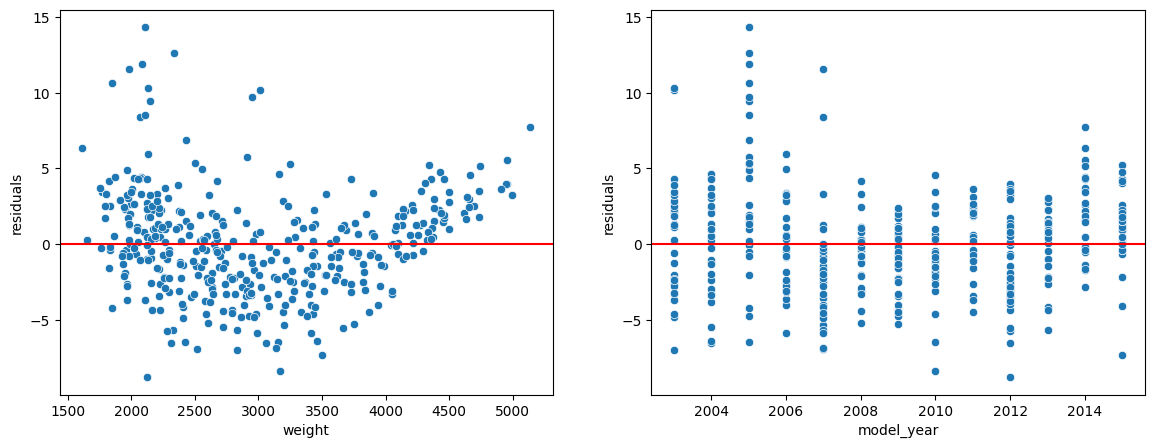

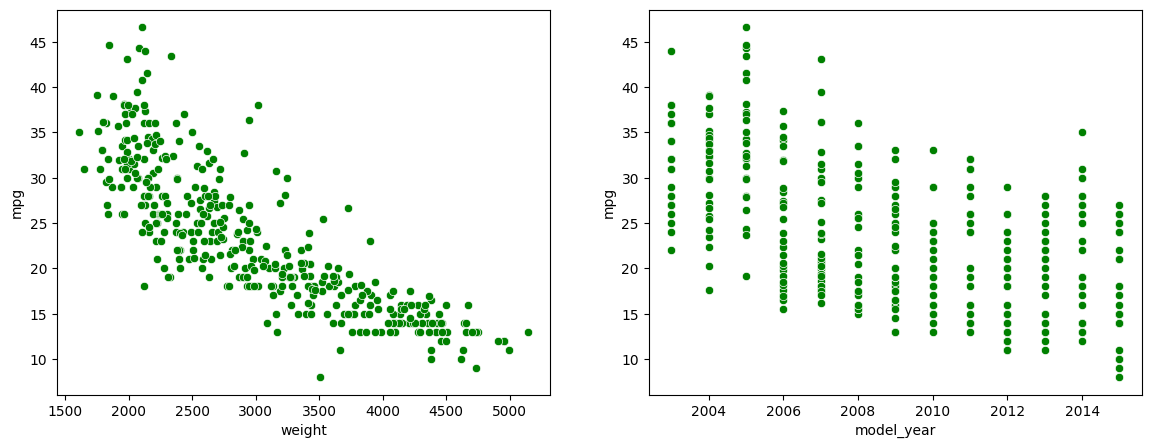

(2097.0883859054175, 4616.54381027555)

In [ ]:
feature_set_bic = ['weight', 'model_year']
estimate_new_model(X, y, feature_set_bic)

#### **Answer**
All the residual values they look somehow randomly scattered around zero, but if we consider carefully, we recognize that they are not really independent, they follow some trends (higher value on the boundaries and smaller value in the middle for feature "weight"). It means that this model is quite good, but we can find a better and more accurate model, which makes scatter plot more random.





###**8. ***### 
Make similar plots but with target on y-axis. Make suggestions on new transformed
features (or target transformation) that may be helpful to create better predictive model. 
Prepare these features and make a new linear regression over these features, compute BIC of 
the new model and compare it to the best model (according to BIC criterion) from question 4. 
Plot residuals vs covariate scatter plots (as in question 7). Interpret the results


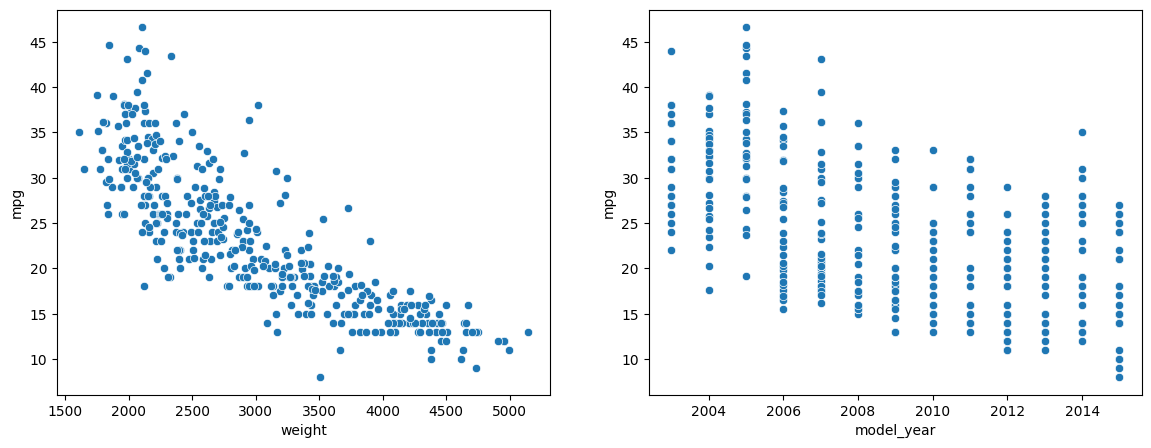

In [ ]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(14, 5))
ax1 = sns.scatterplot(x=X['weight'], y=y['mpg'], ax=ax1)
ax2 = sns.scatterplot(x=X['model_year'], y=y['mpg'], ax=ax2)

plt.show()

#### **Use the natural logarithm for features**

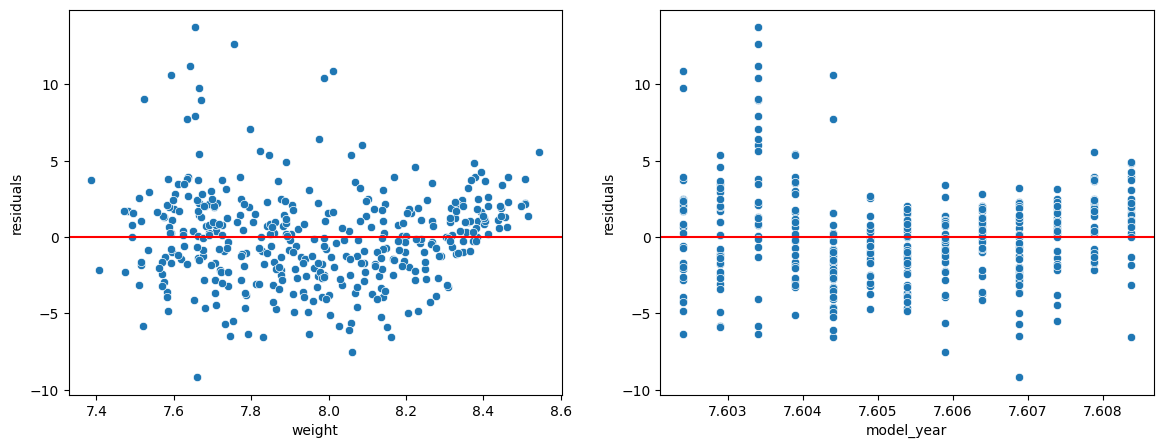

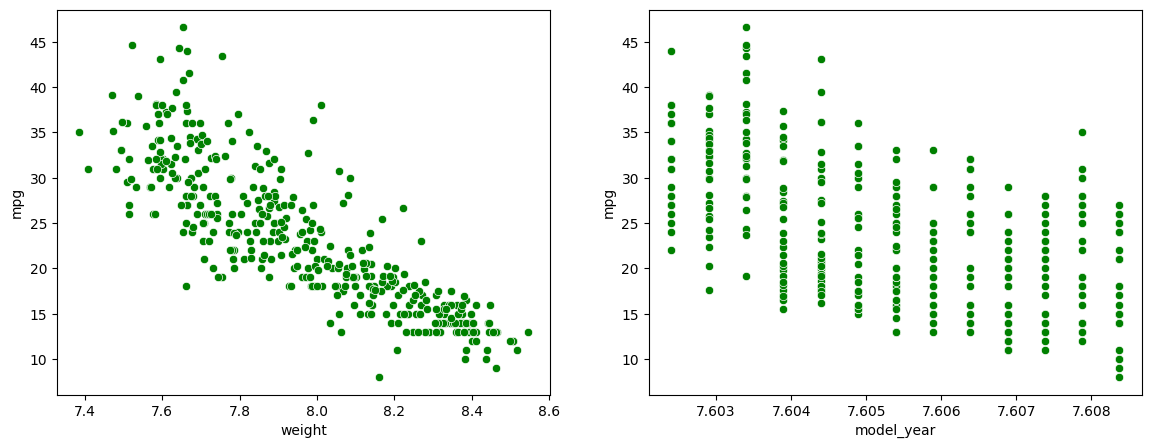

BIC value obtained using BIC criteria: 2097.0883859054175
RSS value obtained using BIC criteria: 4616.54381027555
New BIC value: 2031.5155015779283
New RSS value: 3905.4326303495604


In [ ]:
feature_set_new = ['weight', 'model_year']
y_new = y
X_new = np.log(X)

(new_bic, new_rss) = estimate_new_model(X_new, y_new, feature_set_new)
print("BIC value obtained using BIC criteria:", model_bic.bic)
print("RSS value obtained using BIC criteria:", model_bic.ssr)
print("New BIC value:", new_bic)
print("New RSS value:", new_rss)


#### **Answer**
I keep the set of features the same as what i obtained in problem 1.4: **model_year** and **weight**. I also make a new transformation on this feature set by taking the natural logarithm. The result has been improved:
* The BIC value and RSS value are getting smaller, RSS value decreases almost 20%. 
* In the residuals scatter plots, the points now are more randomly scattered around 0

> => This linear regression model is better then the best model (according to BIC criterion) from question 4.

I thought that it is still not the best linear regression model ever for this dataset, but the result has been improved. The main idea is that choosing a suitable transformation on the features or even on the target will give us a better and more accurate result.



